In [73]:
# 1번
library(readxl)
score <- read_xlsx("score.xlsx")
kmeans_result <- kmeans(score[, c("mid", "final")], centers = 4)
kmeans_result

K-means clustering with 4 clusters of sizes 3, 4, 30, 6

Cluster means:
       mid    final
1 54.33333 16.00000
2 68.25000 57.50000
3 80.80000 87.10000
4 49.50000 60.66667

Clustering vector:
 [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 4 4 2 4 2 2 4
[39] 4 1 4 1 1

Within cluster sum of squares by cluster:
[1] 1196.6667  345.7500 4847.5000  488.8333
 (between_SS / total_SS =  77.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [74]:
# 2번
score$cluster <- kmeans_result$cluster
cross_table <- table(score$degree, score$cluster)
cross_table

   
     1  2  3  4
  A  0  0 16  0
  B  0  1 14  0
  C  1  3  0  6
  D  2  0  0  0

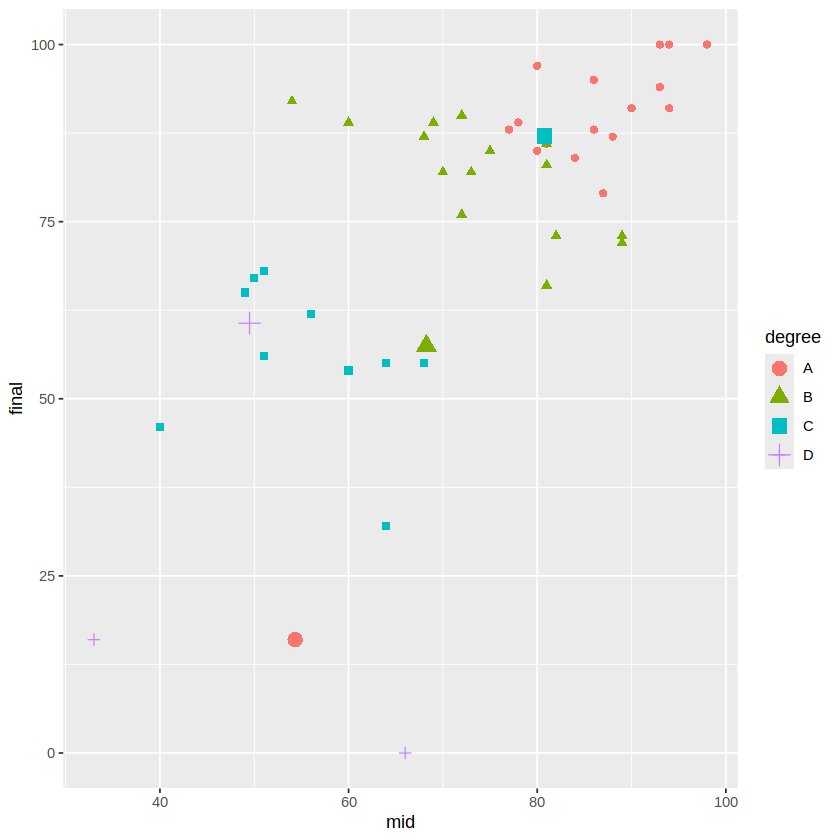

In [75]:
# 3번
centers <- as.data.frame(kmeans_result$centers)

library(ggplot2)
p <- ggplot(score, aes(x = mid, y = final)) +
    geom_point(aes(color = degree, shape = degree), size = 2) +
    geom_point(data = centers, aes(x = mid, y = final, shape = LETTERS[1:4], color = LETTERS[1:4]), size = 4)

p

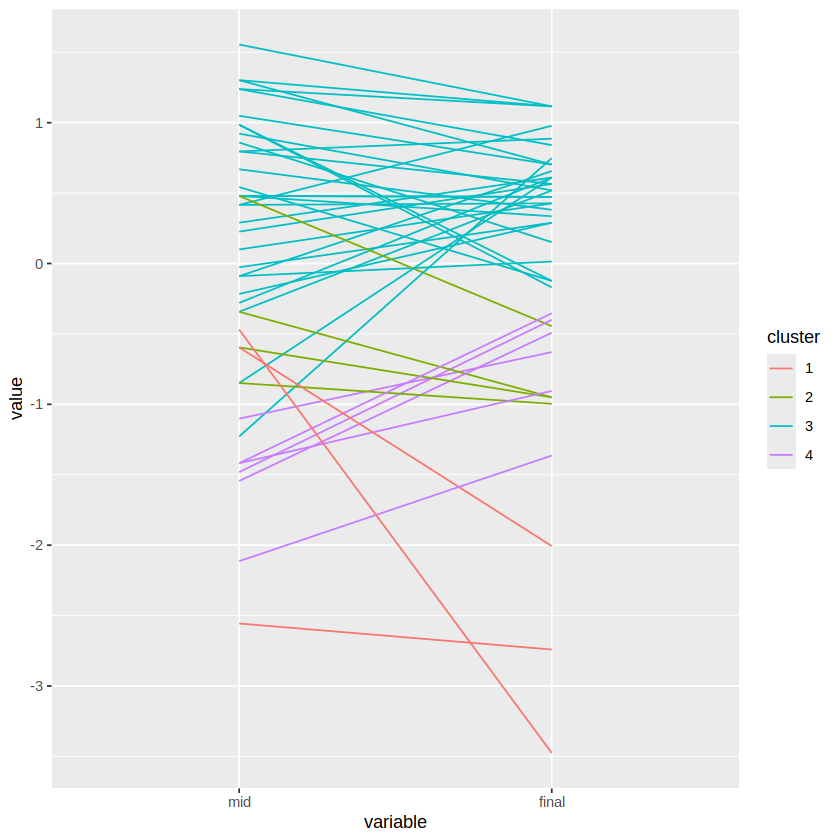

In [76]:
library(GGally)
score$cluster <- as.factor(kmeans_result$cluster)
ggparcoord(data = score, columns = c(1, 2), groupColumn = 'cluster', scale = 'std')


Too few points to calculate an ellipse


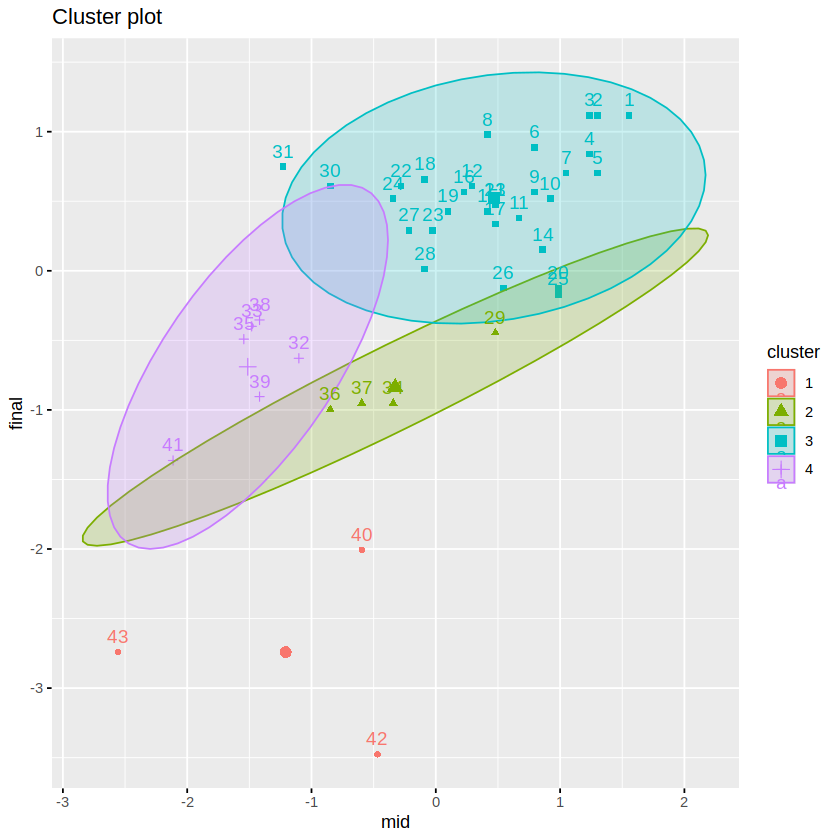

In [77]:
# 5번
library(factoextra)
fviz_cluster(kmeans_result, data = score[1:2], , ellipse.type = "norm")

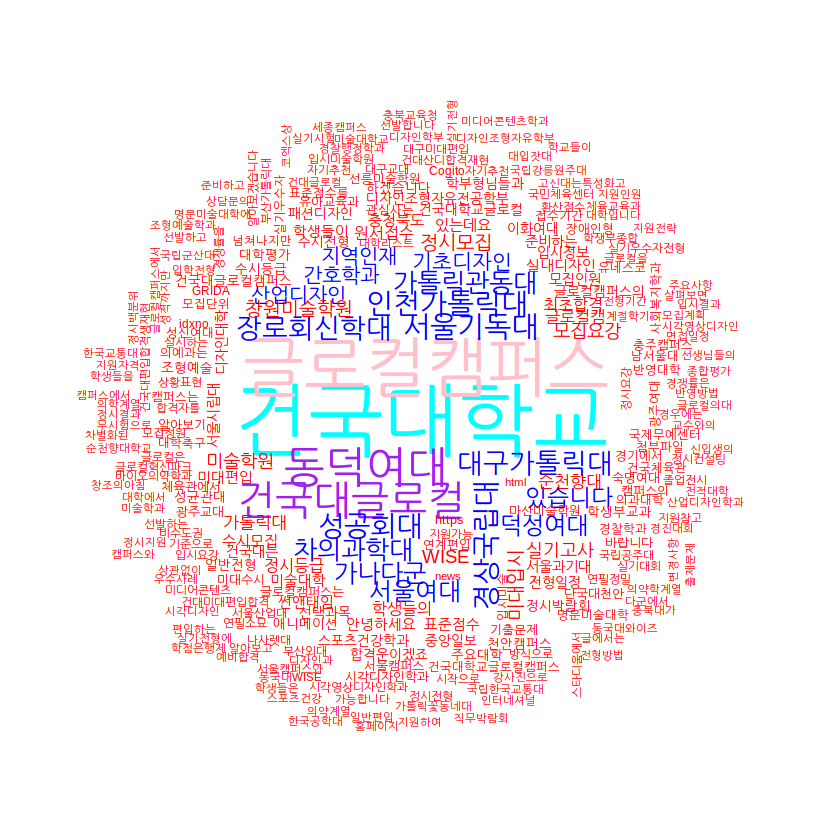

In [86]:
# 6번

library(wordcloud)

text <- readLines("네이버블로그-건국대_글로컬.txt", encoding = "UTF-8")
text <- gsub("<b>|</b>|&quot|[[:punct:]]|[[:digit:]]", " ", text)
words <- unlist(strsplit(text, "\\s+"))
words <- words[nchar(words) > 3]  # 길이가 1 이하인 단어 제거

word_freq <- table(words)
word_freq <- sort(word_freq, decreasing = TRUE)

wordcloud(
  words = names(word_freq),
  freq = word_freq,
  min.freq = 3,
  scale = c(4, 0.5),
  random.order = FALSE,
  colors = c("red", "blue", "green", "purple", "orange", "pink", "cyan")
)


In [79]:
# 7번
library(readxl)
data <- read_xlsx("화재-피해액.xlsx")
correlation_matrix <- cor(data[, c("거리", "피해액")])
correlation_matrix

,거리,피해액
거리,1.0000000,0.9623364
피해액,0.9623364,1.0000000


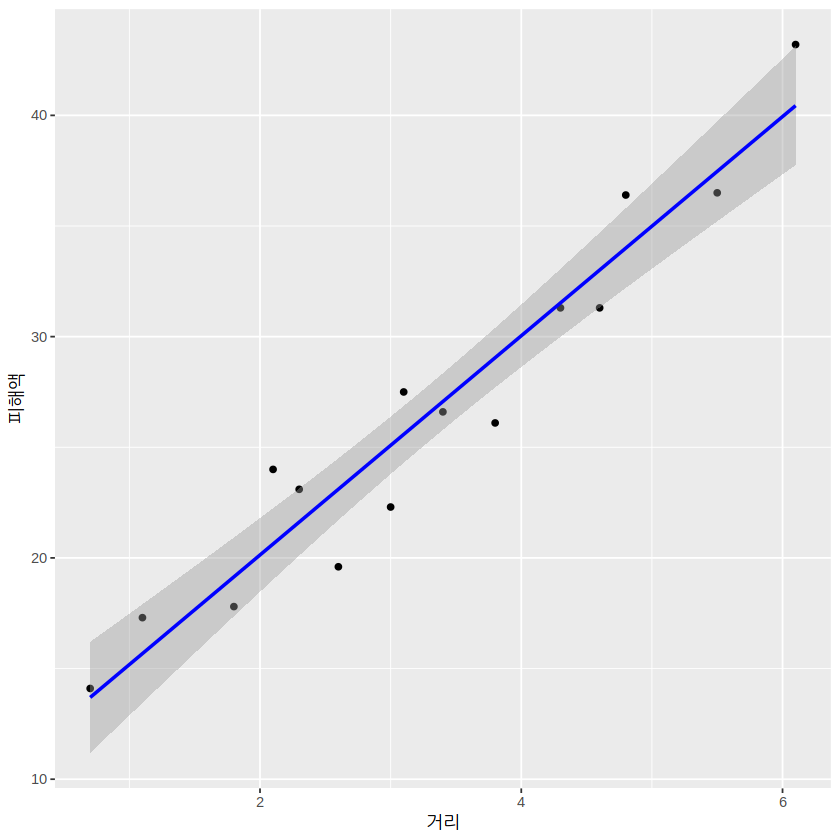

In [80]:
# 8번
library(ggplot2)
ggplot(data, aes(거리 , 피해액)) +
  geom_point() +
  geom_smooth(method = "lm", formula = 'y~x',color = "blue")

In [81]:
# 9번
model <- lm(피해액 ~ 거리, data = data)
summary(model)


Call:
lm(formula = 피해액 ~ 거리, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-3.506 -1.527 -0.225  1.771  3.371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   10.229      1.403   7.289 6.10e-06 ***
거리           4.953      0.388  12.763 9.94e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.289 on 13 degrees of freedom
Multiple R-squared:  0.9261,	Adjusted R-squared:  0.9204 
F-statistic: 162.9 on 1 and 13 DF,  p-value: 9.943e-09


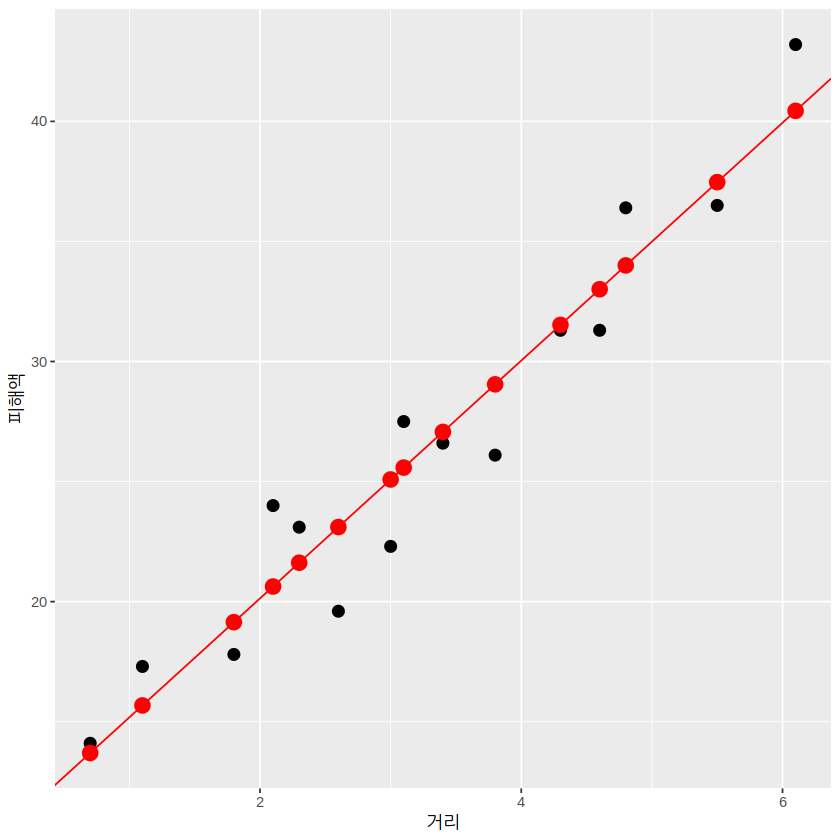

In [82]:
# 10번
model <- lm(피해액 ~ 거리, data = data)

# ggplot으로 산점도와 회귀선, 예측값 표시
p <- ggplot(data, aes(x = 거리, y = 피해액)) +
    geom_point(size = 3, color = 'black') + 
    geom_abline(intercept = coef(model)[1], 
                slope = coef(model)[2], 
                color = 'red') +
    geom_point(aes(y = fitted(model)), color = 'red', size = 4)

p

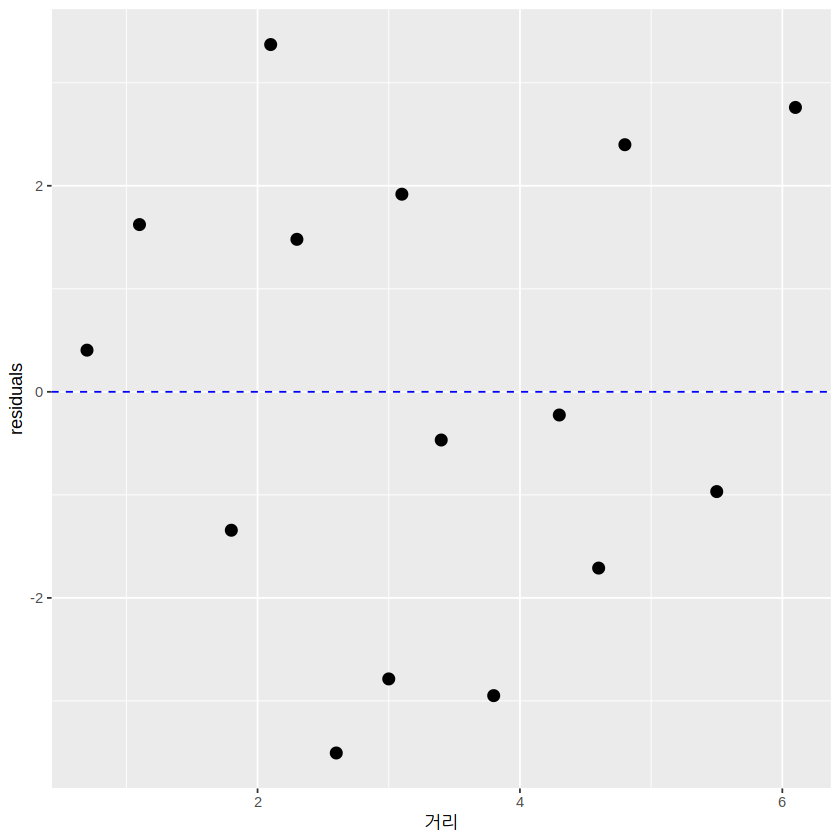

In [83]:
# 11번
data$residuals <- residuals(model)

p <- ggplot(data, aes(x = 거리, y = residuals)) +
    geom_point(size = 3, color = 'black') +
    geom_hline(yintercept = 0, linetype = "dashed", color = "blue")

p

In [84]:
# 12번

new_data <- data.frame(거리 = 1:10)

# 예측값 계산
new_data$predict <- predict(model, newdata = new_data)

new_data

거리,predict
<int>,<dbl>
1,15.18136
2,20.13398
3,25.08660
4,30.03922
5,34.99184
6,39.94446
7,44.89709
8,49.84971
9,54.80233
